# 2023/2024 - Ma412 

# Lab 2: Sparse Regression 

The purpose of this notebook is to use different linear regression algorithms on the dataset Boston House Price. This will include becoming familiar with the notions of regularization and selection of variables.

## 1. Linear regression

We consider $X$ $\in\mathbb{R}^{l\times(n+1)}$ the matrix containing the data whose the ith row is $(x_i,1)$ and $Y$ $\in\mathbb{R}^{l}$ the vector containing the labels $y_i$. We consider the least squares estimator the vector $$
\begin{pmatrix}
\hat{\alpha}\\[3mm]
\hat{\beta} \\[3mm]
\end{pmatrix}= (X^TX)^{-1}X^TY=min_{\alpha\in\mathbb{R}^{n}, \beta\in\mathbb{R}}\sum_{i=1}^l(y_i-(<\alpha,x_i>+\beta))^2$$


#### Questions:
1. Program a $regression(X, Y)$ function that returns the least squares estimator. Use your regression function on the Boston House Prices dataset (to be loaded with
the $datasets.load\_boston()$ function.

In [88]:
# ============================================================
# import des librairie génériques utilisé lors de l'exercice précédent
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, r2_score
from numpy.linalg import inv, pinv

# Import des données 
data_url = "http://lib.stat.cmu.edu/datasets/boston"
raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
target = raw_df.values[1::2, 2]

# X = data, Y = target  par défaut.
X = data
y = target

# Split the dataset into training (70%) and testing (30%) sets 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

# On fait la regression
model = LinearRegression()
# On entraine
model.fit(X_train, y_train)

# On test
y_pred = model.predict(X_test)

# Calcul RMSE
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print("Root Mean Squared Error (RMSE):", rmse)

# Calcul R-squared
r2 = r2_score(y_test, y_pred)
print("R-squared:", r2)

# Afficher le beta hat et le alpha hat
print("Beta hat (coefficients):", model.coef_)
print("Alpha hat (intercept):", model.intercept_)

# Calcul de l'erreur des moindres carrés pour l'ensemble de test
least_squares_error_model = np.sum((y_test - y_pred) ** 2)
print("Erreur des moindres carrés avec le modèle:", least_squares_error_model)



  



# ============================================================

Root Mean Squared Error (RMSE): 5.214975145375402
R-squared: 0.6733825506400196
Beta hat (coefficients): [-1.21310401e-01  4.44664254e-02  1.13416945e-02  2.51124642e+00
 -1.62312529e+01  3.85906801e+00 -9.98516565e-03 -1.50026956e+00
  2.42143466e-01 -1.10716124e-02 -1.01775264e+00  6.81446545e-03
 -4.86738066e-01]
Alpha hat (intercept): 37.93710774183272
Erreur des moindres carrés avec le modèle: 4133.786796566246


2. Compare the vectors $\hat{\alpha}$ and $\hat{\beta}$ returned by the function by using with the $coef\_$ and $intercept\_$ attributes of a $linear\_model.LinearRegression$.
Some useful functions: $dot()$, $transpose()$, $pinv()$.

In [89]:
# ============================================================

# Add a column of ones to X_train for the intercept
X_with_intercept = np.hstack([np.ones((X_train.shape[0], 1)), X_train])


# Compute beta_hat using the formul
beta_hat_formul = np.dot(pinv(np.dot(X_with_intercept.T, X_with_intercept)), np.dot(X_with_intercept.T, y_train))

# Extract alpha_hat and beta_hat from the above result
alpha_hat_formul = beta_hat_formul[0]
beta_hat_formul = beta_hat_formul[1:]

print("Alpha-hat de la formule:", alpha_hat_formul)
print("Alpha-hat du model:", model.intercept_)
print("\nBeta-hat de la formule:", beta_hat_formul)
print("Beta-hat du model:", model.coef_)



# ============================================================

Alpha-hat de la formule: 37.93710774462488
Alpha-hat du model: 37.93710774183272

Beta-hat de la formule: [-1.21310401e-01  4.44664254e-02  1.13416945e-02  2.51124642e+00
 -1.62312529e+01  3.85906801e+00 -9.98516565e-03 -1.50026956e+00
  2.42143466e-01 -1.10716124e-02 -1.01775264e+00  6.81446545e-03
 -4.86738066e-01]
Beta-hat du model: [-1.21310401e-01  4.44664254e-02  1.13416945e-02  2.51124642e+00
 -1.62312529e+01  3.85906801e+00 -9.98516565e-03 -1.50026956e+00
  2.42143466e-01 -1.10716124e-02 -1.01775264e+00  6.81446545e-03
 -4.86738066e-01]


3. Write the funcion $regress(X,\alpha, \beta)$ which returns the vector $\hat{Y}$ of the predicted labels
such as $\hat{y}_i=<\alpha,x_i>+\beta$.

In [90]:
# ============================================================
def regress(X, alpha, beta):

    # Compute the dot product of X and alpha and then add beta
    y_hat = np.dot(X, alpha) + beta
    return y_hat


y_pred = regress(X_test, model.coef_, model.intercept_)
print(y_pred)

# ============================================================

[24.9357079  23.75163164 29.32638296 11.97534566 21.37272478 19.19148525
 20.5717479  21.21154015 19.04572003 20.35463238  5.44119126 16.93688709
 17.15482272  5.3928209  40.20270696 32.31327348 22.46213268 36.50124666
 31.03737014 23.17124551 24.74815321 24.49939403 20.6595791  30.4547583
 22.32487164 10.18932894 17.44286422 18.26103077 35.63299326 20.81960303
 18.27218007 17.72047628 19.33772473 23.62254823 28.97766856 19.45036239
 11.13170639 24.81843595 18.05294835 15.59712226 26.21043403 20.81140432
 22.17349382 15.48367365 22.62261604 24.88561528 19.74754478 23.0465628
  9.84579105 24.36378793 21.47849008 17.62118176 24.39160873 29.95102691
 13.57219422 21.53645439 20.53306273 15.03433182 14.3232289  22.11929299
 17.07321915 21.54141094 32.96766968 31.371599   17.7860591  32.75069556
 18.74795323 19.21428022 19.41970047 23.08087809 22.87732816 24.06399098
 30.52824406 28.71453508 25.90763165  5.17596718 36.8709072  23.76983849
 27.26064379 19.25849042 28.41860517 19.3008798  18.9

4. Calculate the least squares error $\epsilon=\lVert Y-\hat{Y} \rVert_2^2=\sum_{i=1}^l(y_i-\hat{y}_i)^2$ of the learned regressor about the entire Boston dataset.

In [91]:
# Obtenir les prédictions pour l'ensemble de données complet
y_hat_full = regress(X_test, model.coef_, model.intercept_)

# Calculer l'erreur des moindres carrés
epsilon = np.sum((y_test - y_hat_full) ** 2)

print("L'erreur des moindres carrés :", epsilon)


L'erreur des moindres carrés : 4133.786796566246


On se rend compte que les deux approchent donnent des résultat similaires


## 2. Ridge regression

In some cases, the matrix $X^TX$ is not invertible. To remedy to this problem, we add a ridge $\lambda\mathbb{1}$ to this matrix where $\mathbb{1}\in\mathbb{R}^{(n+1)\times(n+1)}$ is the following matrix:

$$\begin{pmatrix}
1 & ... & \cdots & 0 \\
0& \ddots & \cdots & 0 \\
\vdots & \vdots & 1 & \vdots \\
0 & 0 & \cdots & 0
\end{pmatrix}$$

This corresponds to a slight modification of the optimization problem which penalizes the size of the
coefficients. The generalized least squares vector is given by: 
$$\begin{pmatrix}
\hat{\alpha}\\[3mm]
\hat{\beta} \\[3mm]
\end{pmatrix}= (X^TX+\lambda\mathbb{1})^{-1}X^TY=min_{\alpha\in\mathbb{R}^{n}, \beta\in\mathbb{R}}\sum_{i=1}^l(y_i-(<\alpha,x_i>+\beta))^2+\lambda\lVert \alpha \rVert_2^2$$


#### Questions:
1. Program a $ridge\_regression(X, Y,\lambda)$ function that returns the least squares estimator. Compare again the vectors $\hat{\alpha}$ and $\hat{\beta}$ obtained for the parameter
$\lambda = 1$ on the Boston dataset using $coe\_$ and $intercept\_$ attributes of a regressor $linear\_model.Ridge$.

In [92]:
# ============================================================
from sklearn.linear_model import Ridge
import numpy as np
import matplotlib.pyplot as plt

def ridge_regression(X, Y, λ):
    model = Ridge(alpha=λ)
    model.fit(X, Y)
    return model.coef_, model.intercept_
X = data
y = target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

α_hat, β_hat = ridge_regression(X_train, y_train, 1)

print("Alpha hat (coefficients):", α_hat)
print("Beta hat (intercept):", β_hat)

# ============================================================

Alpha hat (coefficients): [-1.18308575e-01  4.61259764e-02 -2.08626416e-02  2.45868617e+00
 -8.25958494e+00  3.89748516e+00 -1.79140171e-02 -1.39737175e+00
  2.18432298e-01 -1.16338128e-02 -9.31711410e-01  7.26996266e-03
 -4.94046539e-01]
Beta hat (intercept): 32.53698634606846


2. Plot the evolution of the coefficients of the vector $\hat{\alpha}$ as a function of the regularization parameter
$\lambda$ for values between $1e-3$ and $1e3$. Which variables seem to best explain the house prices in Boston?

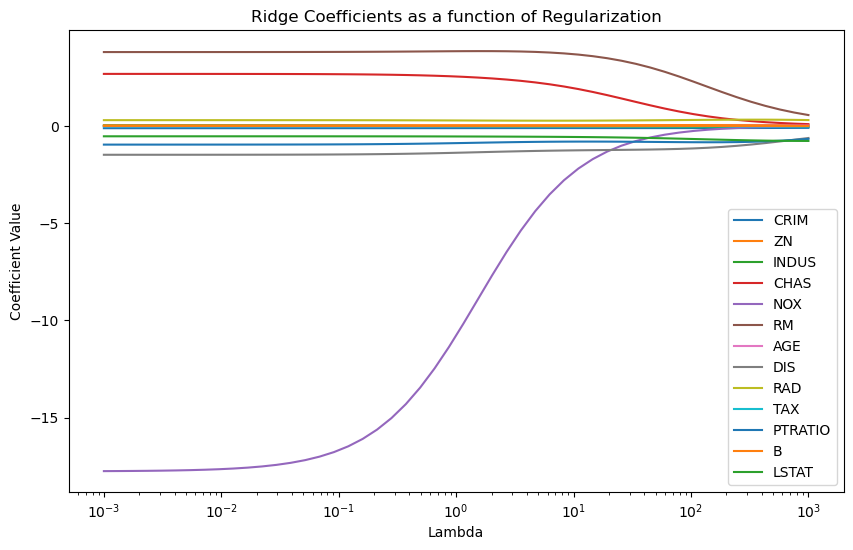

In [93]:
# ============================================================

# Liste typique des noms de colonnes pour le dataset de Boston (cette ligne est obligatoire a cause de la facon dont j'importe)
column_names = ["CRIM", "ZN", "INDUS", "CHAS", "NOX", "RM", "AGE", "DIS", "RAD", "TAX", "PTRATIO", "B", "LSTAT"]

# Définition de la plage des valeurs de lambda
lambdas = np.logspace(-3, 3, 50)
coefficients = []

# Entrainement de la régression Ridge pour différentes valeurs de lambda
for l in lambdas:
    ridge = Ridge(alpha=l)
    ridge.fit(data, target)
    coefficients.append(ridge.coef_)

# Tracer l'évolution des coefficients en fonction de lambda
plt.figure(figsize=(10, 6))
for i in range(len(column_names)):
    plt.plot(lambdas, [coef[i] for coef in coefficients], label=column_names[i])

plt.xscale('log')
plt.xlabel('Lambda')
plt.ylabel('Coefficient Value')
plt.title('Ridge Coefficients as a function of Regularization')
plt.legend()
plt.show()

# ============================================================

On se rends compte que "indus "est la variable qui qui explique le mieux les prix de boston car elle ne décend pas a Zero

3. Find by some appropriate means the best value for the parameter $\lambda$ . Learn then and run a regressor with this value on the entire Boston dataset and compute
the error in the sense of least squares on this same sample.

In [94]:
# ============================================================
from sklearn.linear_model import RidgeCV
from sklearn.metrics import mean_squared_error

# Définir les valeurs de lambda à tester
lambdas = np.logspace(-6, 6, 13)

# Utilisation de RidgeCV pour trouver le meilleur lambda via validation croisée
ridge_cv = RidgeCV(alphas=lambdas, store_cv_values=True)
ridge_cv.fit(X_train, y_train)

# Récupérer le meilleur lambda
best_lambda = ridge_cv.alpha_

print(f"Le meilleur lambda trouvé est : {best_lambda}")

# Entraîner un modèle Ridge avec le meilleur lambda sur l'ensemble d'entraînement
ridge_best = Ridge(alpha=best_lambda)
ridge_best.fit(X_train, y_train)

# Prédire sur l'ensemble de test
y_pred = ridge_best.predict(X_test)

# Calculer l'erreur au sens des moindres carrés sur l'ensemble de test
ls_error = mean_squared_error(y_test, y_pred) * len(y_test)
print(f"Erreur des moindres carrés sur l'ensemble de test : {ls_error}")
# ============================================================

Le meilleur lambda trouvé est : 0.1
Erreur des moindres carrés sur l'ensemble de test : 4144.371326192782


## 3. LASSO regression

In this regularization, the penalization of the vector of the coefficients is done here with the norm $l_1$ instead of the Euclidean norm $l_2$. Consider $\alpha\in\mathbb{R}^{n}$, $\lVert \alpha \rVert_1=\sum_{i=1}^n|\alpha_i|$. Solutions are then parsimonious. The optimization problem is given by:
$$min_{\alpha\in\mathbb{R}^{n}, \beta\in\mathbb{R}}\sum_{i=1}^l(y_i-(<\alpha,x_i>+\beta))^2+\lambda\lVert \alpha \rVert_1$$

#### Questions:
1. Using the $linear\_model.Lasso$ class, plot the evolution of the coefficients of the vector $\hat{\alpha}$ regarding the value of the parameter $\lambda$. Which variables seem to best explain the
house prices in Boston? Are they the same as those found in the previous exercise? How do other variables behave when the value of $\lambda$ increases?

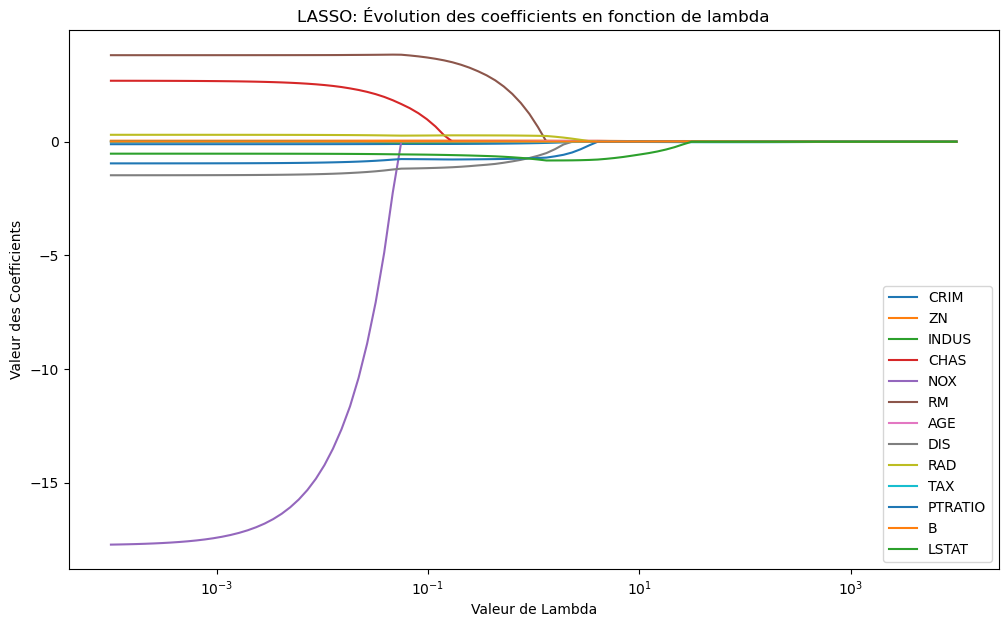

In [95]:
# ============================================================
from sklearn.linear_model import Lasso
import matplotlib.pyplot as plt
import numpy as np

# Définir une plage de valeurs pour lambda
lambdas = np.logspace(-4, 4, 100)
coefficients = []

# Pour chaque valeur de lambda, entraînez un modèle LASSO et stockez les coefficients
for l in lambdas:
    lasso = Lasso(alpha=l, max_iter=10000)
    lasso.fit(data, target)
    coefficients.append(lasso.coef_)

# Tracez l'évolution des coefficients
plt.figure(figsize=(12, 7))
for i in range(data.shape[1]):
    plt.plot(lambdas, [coef[i] for coef in coefficients], label=column_names[i] )
plt.xscale('log')
plt.xlabel('Valeur de Lambda')
plt.ylabel('Valeur des Coefficients')
plt.title('LASSO: Évolution des coefficients en fonction de lambda')
plt.legend()
plt.show()


# ============================================================

Encore une fois indus semble très sinificatif, certaine variables comme ZN semblent insignifiantes.

2. Find by some appropriate means the best value for the $\lambda$ parameter. Learn then and run a regressor with this value on the entire Boston dataset and compute
the error in the sense of least squares on this same sample.

In [99]:
# ============================================================
from sklearn.linear_model import LassoCV
from sklearn.metrics import mean_squared_error

#Utilisez LassoCV pour trouver le meilleur lambda sur l'ensemble d'entraînement
lasso_cv = LassoCV(alphas=lambdas, cv=5, max_iter=10000)
lasso_cv.fit(X_train, y_train)

# La meilleure valeur de lambda
best_lambda = lasso_cv.alpha_
print(f"La meilleure valeur pour lambda est : {best_lambda}")

# 2. Entraînez un modèle LASSO avec la meilleure valeur de lambda sur l'ensemble d'entraînement
lasso_best = Lasso(alpha=best_lambda, max_iter=10000)
lasso_best.fit(X_train, y_train)

# Prédire sur l'ensemble de test
y_pred = lasso_best.predict(X_test)

# 3. Calculez l'erreur au sens des moindres carrés sur l'ensemble de test
mse = mean_squared_error(y_test, y_pred)
print(f"Erreur des moindres carrés sur l'ensemble de test : {mse}")

# ============================================================

La meilleure valeur pour lambda est : 0.0001
Erreur des moindres carrés sur l'ensemble de test : 27.197493368740695


## 4. Elastic Net Regression

In Elastic Net Regularization we add the both terms of $l_1$ and $l_2$ to get the final loss function. Referring to the course, apply the elastic Net regularization to train your model, calculate the prediction and the mean square error. 

In [100]:
from sklearn.linear_model import ElasticNet



# Création du modèle Elastic Net
 
l1_ratio = 0.5  # 0 = Ridge, 1 = Lasso
elastic_net = ElasticNet(alpha=alpha, l1_ratio=l1_ratio, max_iter=10000)

# Entraînement du modèle sur l'ensemble d'entraînement
elastic_net.fit(X_train, y_train)

# Prédire sur l'ensemble de test
y_pred = elastic_net.predict(X_test)

# Calcul de l'erreur des moindres carrés sur l'ensemble de test
mse = mean_squared_error(y_test, y_pred)
print(f"Erreur des moindres carrés avec Elastic Net sur l'ensemble de test : {mse}")



Erreur des moindres carrés avec Elastic Net sur l'ensemble de test : 31.87361081774105


From the above analysis, which conclusions can you reach about the different regularization methods ?

D'après les résultat que j'ai obtenu il semblerait que lLa lasso et l'elastic net regressions sont bien meilleur que les autres

## 5. Your Turn

The purpose now is to test these approaches on other datasets. You may choose one from the UCI machine learning repository http://archive.ics.uci.edu/.
Download a dataset, and try to determine the optimal set of parameters to use to model it! 

In [86]:
# ============================================================
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import Ridge, Lasso, ElasticNet

# Téléchargement des données
url = "http://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv"
data = pd.read_csv(url, sep=";")

# Séparation des caractéristiques et de la cible
X = data.drop("quality", axis=1)
y = data["quality"]

# Séparation en ensemble d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Utilisez GridSearchCV pour trouver les meilleurs paramètres pour Ridge
ridge_params = {'alpha': [1e-3, 1e-2, 1e-1, 1, 10, 100]}
ridge_grid = GridSearchCV(Ridge(), ridge_params, cv=5)
ridge_grid.fit(X_train, y_train)
print(f"Meilleur paramètre pour Ridge: {ridge_grid.best_params_}")
print(f"Score pour Ridge: {ridge_grid.score(X_test, y_test)}\n")

# Utilisez GridSearchCV pour trouver les meilleurs paramètres pour Lasso
lasso_params = {'alpha': [1e-3, 1e-2, 1e-1, 1, 10, 100]}
lasso_grid = GridSearchCV(Lasso(), lasso_params, cv=5)
lasso_grid.fit(X_train, y_train)
print(f"Meilleur paramètre pour Lasso: {lasso_grid.best_params_}")
print(f"Score pour Lasso: {lasso_grid.score(X_test, y_test)}\n")

# Utilisez GridSearchCV pour trouver les meilleurs paramètres pour ElasticNet
elastic_params = {'alpha': [1e-3, 1e-2, 1e-1, 1, 10, 100], 'l1_ratio': [0.2, 0.4, 0.6, 0.8]}
elastic_grid = GridSearchCV(ElasticNet(max_iter=10000), elastic_params, cv=5)
elastic_grid.fit(X_train, y_train)
print(f"Meilleur paramètre pour ElasticNet: {elastic_grid.best_params_}")
print(f"Score pour ElasticNet: {elastic_grid.score(X_test, y_test)}")

# ============================================================

Meilleur paramètre pour Ridge: {'alpha': 1}
Score pour Ridge: 0.347282371002654

Meilleur paramètre pour Lasso: {'alpha': 0.001}
Score pour Lasso: 0.3463290155311871

Meilleur paramètre pour ElasticNet: {'alpha': 0.001, 'l1_ratio': 0.2}
Score pour ElasticNet: 0.34682063590526424


Les résultats observé ici me font douter les résultat précédent mais je n'arrive pas a trouver mon erreur.